# Classification with deep learning

In this project I will use a dataset from Kaggle. The goal is to predict the survival rate of patients with heart failure from certain factors like age, anemia, diabetes.. 

Cardiovascular diseases are the #1 cause of death globally, and it takes 17.9 million lives each year. This accounts for 31% percent of all deaths world wide!

These deaths are avoidable and can be prevented by addressing behavioural risk factors like smoking and an unhealthy diet. 

People with high risk of cardiovasucalar disease need an early detection and management. This is where the deep learning model comes in. 


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
import numpy as np

## Loading data
Here we need to load the data, get the distribution of our label column ('death_event') and extract the features and labels

In [3]:
data = pd.read_csv('heart_failure.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                299 non-null    int64  
 1   age                       299 non-null    float64
 2   anaemia                   299 non-null    object 
 3   creatinine_phosphokinase  299 non-null    int64  
 4   diabetes                  299 non-null    object 
 5   ejection_fraction         299 non-null    int64  
 6   high_blood_pressure       299 non-null    object 
 7   platelets                 299 non-null    float64
 8   serum_creatinine          299 non-null    float64
 9   serum_sodium              299 non-null    int64  
 10  sex                       299 non-null    object 
 11  smoking                   299 non-null    object 
 12  time                      299 non-null    int64  
 13  DEATH_EVENT               299 non-null    int64  
 14  death_even

We need to find the distribution of death_event, because this is the column we will predict. 

In [4]:
Counter(data['death_event'])

Counter({'yes': 96, 'no': 203})

In [5]:
y = data['DEATH_EVENT']
x = data[['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time']]

## Data preprocessing
In this step we need to (1) create one-hot encoding vectors for the non-numerical attributes, (2) make train and test split, (3) scale the numeric features

In [6]:
#1 
x = pd.get_dummies(x)

#2
X_train, X_test, Y_train, Y_test = train_test_split(x,y, train_size=0.33, random_state=20)

#3
ct = ColumnTransformer([("standard", StandardScaler(),['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time'])])

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)


## Preparing labels for classification
Here we must (1) use a label encoder (2) in order to fit_transform the attributes (3) in order to transform the encoded labels in to a binary vector

In [7]:
# 1
le = LabelEncoder()

#2
Y_train = le.fit_transform(Y_train.astype(str))
Y_test = le.transform(Y_test.astype(str))

#3
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

## Designing the model
Here we are going to define a function in order to create the model we are going to use for this classification task.

It is going to have:
- 1 hidden layer with 12 nodes which uses the relu activation function
- an output layer with 2 nodes which uses the softmax activation function

As for the loss function it is going to use categorical crossentropy, and the optimizer in use is Adam. 

In [46]:
def create_model(features):
    model = Sequential()
    # Creating the input layer
    input = InputLayer(input_shape=(features.shape[1],))
    model.add(input)

    # Hidden layer
    model.add(Dense(15,activation='relu'))

    #Output layer
    model.add(Dense(2,activation='softmax'))

    # Printing the model
    print(model.summary())

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

    return model

model = create_model(X_train)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 15)                120       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 32        
Total params: 152
Trainable params: 152
Non-trainable params: 0
_________________________________________________________________
None


## Training and evaluating the model

In [47]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose = 1)

Epoch 1/100
98/98 [==============================] - 0s 1ms/step - loss: 0.7866 - accuracy: 0.3980
Epoch 2/100
98/98 [==============================] - 0s 2ms/step - loss: 0.6390 - accuracy: 0.6735
Epoch 3/100
98/98 [==============================] - 0s 1ms/step - loss: 0.5536 - accuracy: 0.7959
Epoch 4/100
98/98 [==============================] - 0s 1ms/step - loss: 0.4972 - accuracy: 0.7959
Epoch 5/100
98/98 [==============================] - 0s 911us/step - loss: 0.4559 - accuracy: 0.8061
Epoch 6/100
98/98 [==============================] - 0s 883us/step - loss: 0.4244 - accuracy: 0.8469
Epoch 7/100
98/98 [==============================] - 0s 1ms/step - loss: 0.4031 - accuracy: 0.8367
Epoch 8/100
98/98 [==============================] - 0s 1ms/step - loss: 0.3867 - accuracy: 0.8469
Epoch 9/100
98/98 [==============================] - 0s 1ms/step - loss: 0.3721 - accuracy: 0.8163
Epoch 10/100
98/98 [==============================] - 0s 905us/step - loss: 0.3607 - accuracy: 0.8367
Epo

In [48]:
loss, acc = model.evaluate(X_test, Y_test, verbose=0)

print(f"The loss is {loss*100}% and the accuracy is {acc*100}%")

The loss is 60.30872464179993% and the accuracy is 80.09950518608093%


## Classification report

In [49]:
y_estimate = model.predict(X_test, verbose=0)
y_estimate = np.argmax(y_estimate, axis=1)
y_true = np.argmax(Y_test, axis=1)

print(classification_report(y_true,y_estimate))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       138
           1       0.70      0.63      0.67        63

    accuracy                           0.80       201
   macro avg       0.77      0.76      0.76       201
weighted avg       0.80      0.80      0.80       201



## Plots

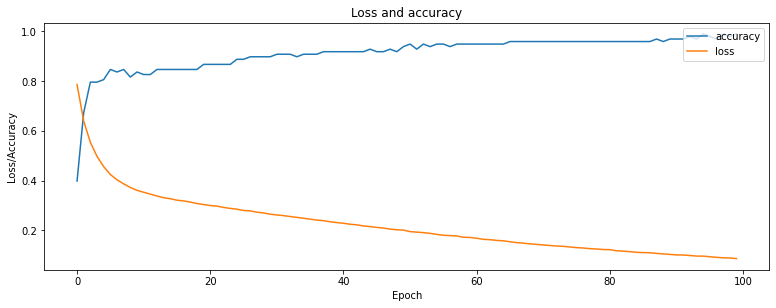

In [50]:

accuracy = history.history['accuracy']
loss = history.history['loss']

fig = plt.figure(figsize=(13,10))
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(accuracy)
ax2.plot(loss)
ax2.set_title('Loss and accuracy')
ax2.set_ylabel('Loss/Accuracy')
ax2.set_xlabel('Epoch')
ax2.legend(['accuracy', 'loss'], loc='upper right')

plt.show() 